## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





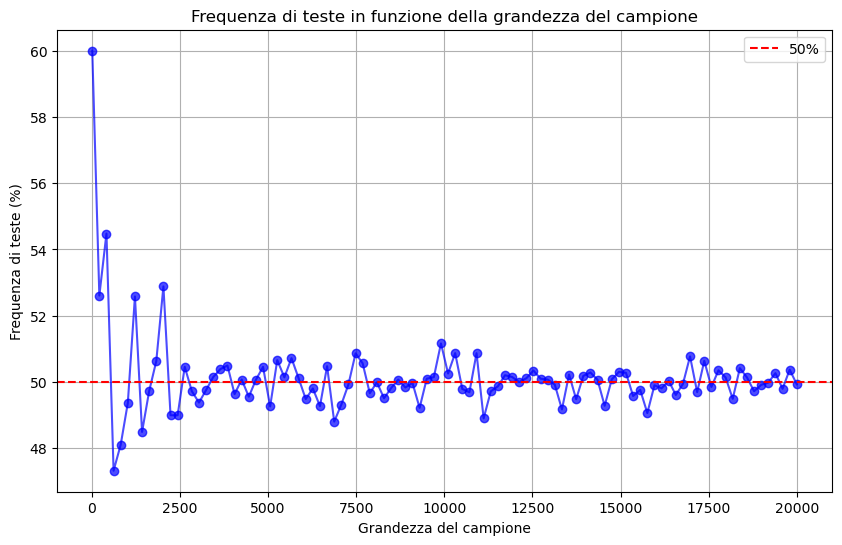

In [1]:
import random

# Funzione che simula il lancio di una moneta e restituisce la frequenza di volte che è uscita testa in %
def frequenza_Testa(Lanci):
    testa = sum(random.choice(['testa', 'croce']) == 'testa' for _ in range(Lanci))
    frequenzaTesta = (testa / Lanci) * 100
    return frequenzaTesta

#Punto 2 - Calcolare la frequenza % con la grandezza che varia da 10 a 20 000 che varia 100 volte
import numpy as np
campioni = np.linspace(10, 20000, 100, dtype=int)
f_testa = [frequenza_Testa(campione) for campione in campioni]

#Punto 3 - Plottare il numero medio di teste rispetto alla grandezza del campione
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(campioni, f_testa, marker='o', linestyle='-', color='blue', alpha=0.7)
plt.axhline(y=50, color='r', linestyle='--', label='50%')
plt.title('Frequenza di teste in funzione della grandezza del campione')
plt.xlabel('Grandezza del campione')
plt.ylabel('Frequenza di teste (%)')
plt.legend()
plt.grid(True)
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

Il dataset ha 891 righe e 12 colonne.
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Colonna 'Age' ha 177 valori mancanti.
Colonna 'Cabin' ha 687 valori mancanti.
Colonna 'Embarked' ha 2 valori mancanti.
La moda della colonna 'Embarked' è: S
Il dataset ha 714 righe e 12 colonne.
Il dataset ha 0 righe duplicate.
Le classi di appartenenza sono: [3 1 2]
Media dell'eta dei passeggeri per la classe di appartenenza: {'3': np.float64(25.14061971830986), '1': np.float64(38.23344086021506), '2': np.float64(29.87763005780347)}


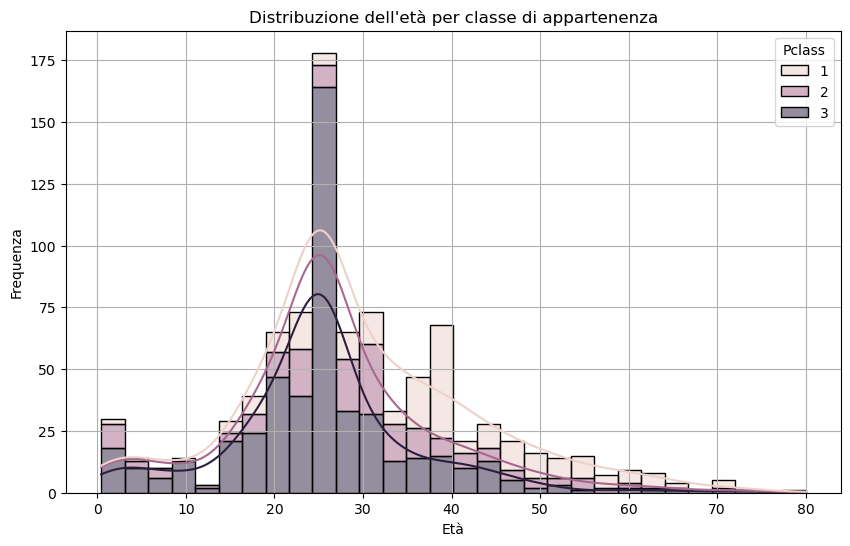

<Figure size 1000x600 with 0 Axes>

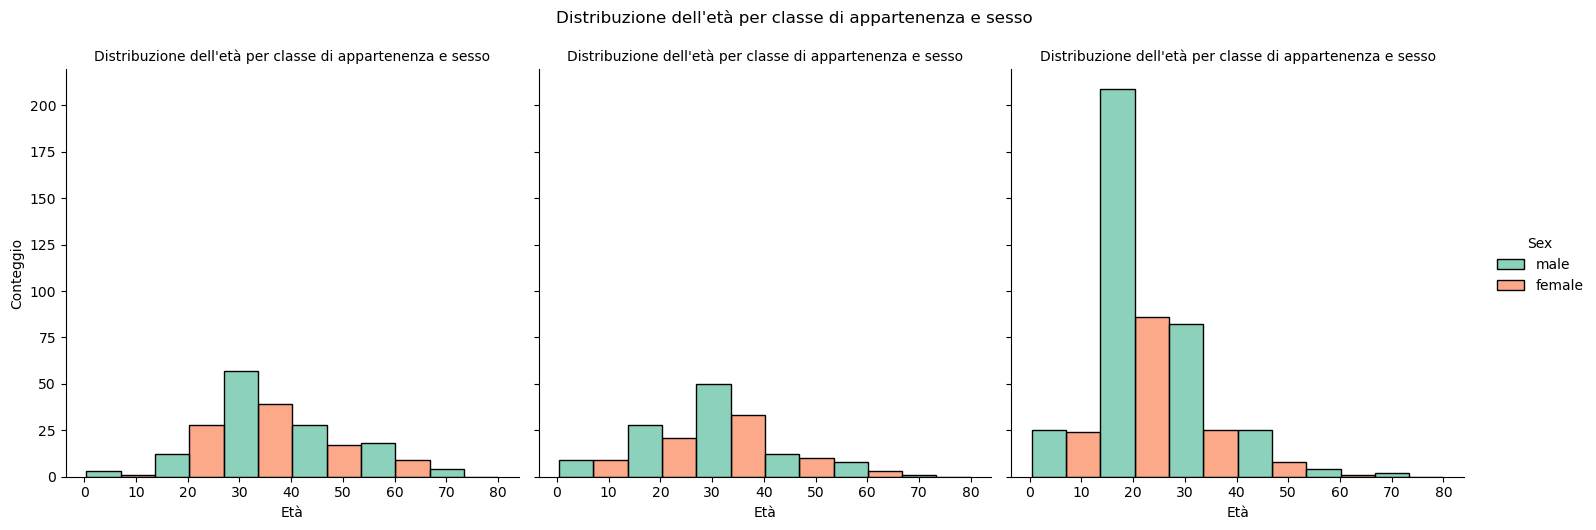

In [11]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

#Punto 1 - Memorizzo il numero di colonne del dataset
righe, colonne = df.shape 
print(f"Il dataset ha {righe} righe e {colonne} colonne.")
print(df.columns)   #Mostra i nomi delle colonne del dataframe

#Punto 2 - Controllare quanti valori mancanti ci sono nelle colonne del dataframe
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 0:
        print(f"Colonna '{column}' ha {missing_values} valori mancanti.")

#Punto 3 - Verifico la moda della colonna Embarked e la sostituisco ai valori nulli
embarked_mode = df['Embarked'].mode()[0]
print(f"La moda della colonna 'Embarked' è: {embarked_mode}")
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

#Punto 4 - Rimuovo le righe che non hanno valori nella colonna Age
df = df.dropna(subset=['Age']) #dropna -> Metodo per rimuovere righe o colonne con valori nulli
df.reset_index(drop=True) #reset_index -> Metodo per ripristinare gli indici del dataframe - dopo dropna gli indici non sono più consecutivi
righe, colonne = df.shape 
print(f"Il dataset ha {righe} righe e {colonne} colonne.")

#Punto 5 - Verificare se ci sono righe duplicate
row_duplicate = df.duplicated().sum() #Controlla se ci sono righe duplicate
print(f"Il dataset ha {row_duplicate} righe duplicate.")

#Punto 6 - Calcolare la media dell'età dei passeggeri per la classe di appartenenza
#Valori unici della colonna Pclass - Vedo i limiti delle classi
df = pd.read_csv(url)
classes = df['Pclass'].unique() #Ritorna i valori della colonna Pclass presi una volta sola
print(f"Le classi di appartenenza sono: {classes}") # Classes --> Array numPy (Elementi dello stesso tipo)

#Calcolo la media dell'età dei passeggeri per la classe di appartenenza
mean_ages = {} #Dizionario vuoto per memorizzare le medie delle età appartennenti a ciascuna classe
for c in classes:
    mean_ages[str(c)] = df[df['Pclass'] == c]['Age'].mean() #Calcolo la media dell'età dei passeggeri per la classe di appartenenza

#Ora devo sostituire i valori nulli della colonna Age con la media dell'età dei passeggeri per la classe di appartenenza
for c in classes:
    mean_age = mean_ages[str(c)]
    df.loc[(df['Pclass'] == c) & (df['Age'].isnull()), 'Age'] = mean_age #Sostituisco i valori nulli con la media dell'età dei passeggeri per la classe di appartenenza

#Calcolo l'età media dei passeggeri per la classe di appartenenza
mean_ages = {} #Dizionario vuoto per memorizzare le medie delle età appartennenti a ciascuna classe
for c in classes:
    mean_ages[str(c)] = df[df['Pclass'] == c]['Age'].mean() #Calcolo la media dell'età dei passeggeri per la classe di appartenenza
print(f"Media dell'eta dei passeggeri per la classe di appartenenza: {mean_ages}")

#Punto 7 - Visualizzare la distribuzione dell'età per la classe dei passeggeri appartenenti alle classi 1, 2 e 3
#Creazione del grafico
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', bins=30, kde=True) #sns.histplot -> Metodo per creare un istogramma
plt.title('Distribuzione dell\'età per classe di appartenenza')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()


#Punto 8 - Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne
#Creazione del grafico
plt.figure(figsize=(10, 6))
g = sns.displot(data=df, x='Age', col='Pclass', hue='Sex', multiple='dodge', bins=6, palette='Set2', element='bars') #sns.histplot -> Metodo per creare un istogramma
g.set_titles('Distribuzione dell\'età per classe di appartenenza e sesso')
g.set_axis_labels("Età", "Conteggio")
plt.suptitle('Distribuzione dell\'età per classe di appartenenza e sesso', y=1.05)
plt.show()



## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
Lunghezza media dei petali per specie:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64
Larghezza media dei petali per specie:
species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64


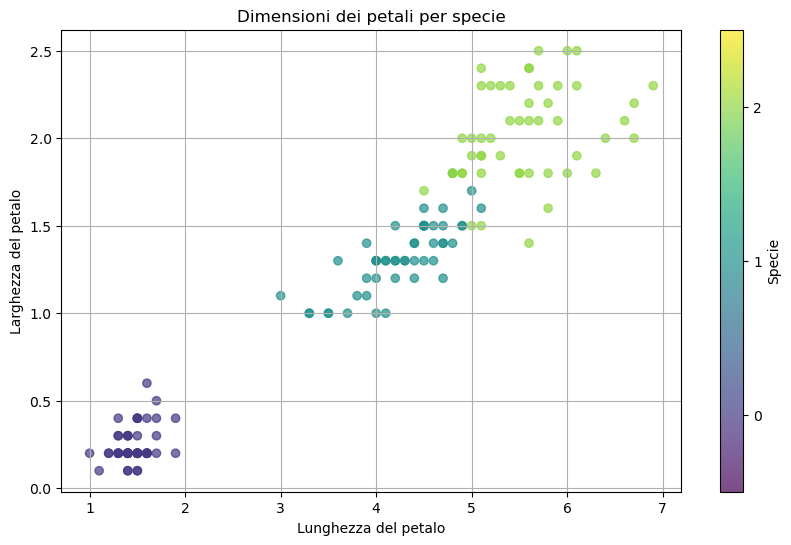

sepal_length    0.857300
sepal_width    -0.288431
petal_length    0.958422
petal_width     0.980333
petal_area      1.000000
Name: petal_area, dtype: float64


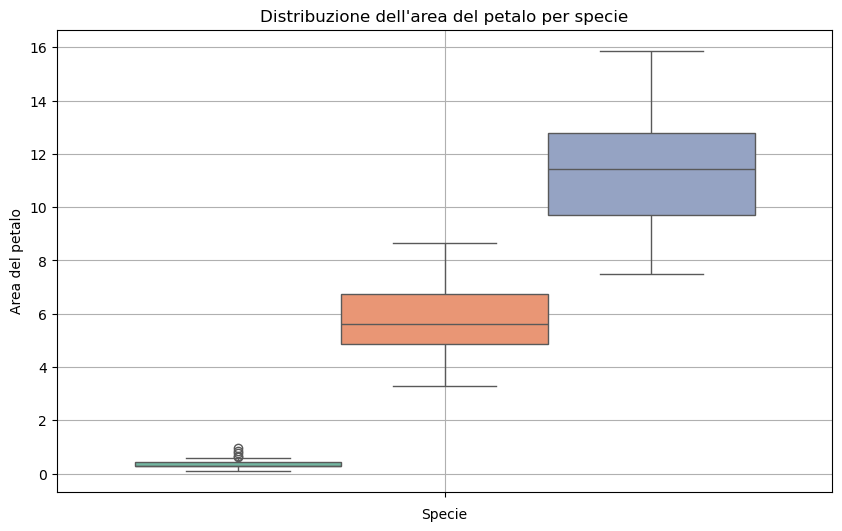

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

#Punto 1 - Contare quanti campioni ci sono per ogni specie
species_count = df['species'].value_counts()
print(species_count)

#Punto 2 - Calcolare la lunghezza e larghezza media dei petali per specie
mean_petal_length = df.groupby('species')['petal_length'].mean()
mean_petal_width = df.groupby('species')['petal_width'].mean()
print("Lunghezza media dei petali per specie:")
print(mean_petal_length)
print("Larghezza media dei petali per specie:")
print(mean_petal_width)

#Punto 3 - Visualizza le dimensioni dei petali per specie
plt.figure(figsize=(10, 6))
plt.scatter(df['petal_length'], df['petal_width'], c=df['species'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.title('Dimensioni dei petali per specie')
plt.xlabel('Lunghezza del petalo')
plt.ylabel('Larghezza del petalo')
plt.colorbar(ticks=[0, 1, 2], label='Specie')
plt.clim(-0.5, 2.5)
plt.grid(True)
plt.show()

#Punto 4 - Creare una nuova colonna per area petalo ed analizzarla
df['petal_area'] = df['petal_length'] * df['petal_width']
df['petal_area'].describe() #Mostra le statistiche descrittive della colonna petal_area
correlaction = df.corr(numeric_only=True) ['petal_area']
print(correlaction) #Mostra la correlazione tra petal_area e le altre colonne del dataframe

#Punto 5 - Grafico della distribuzione dell'area del petalo per specie boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='petal_area', hue='species', legend=False,data=df, palette='Set2')
plt.title('Distribuzione dell\'area del petalo per specie')
plt.xlabel('Specie')
plt.ylabel('Area del petalo')
plt.grid(True)
plt.show()
